#Goal: Predict quality ranking of white wine based on its chemical properties.

In [458]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.datasets as datasets

from seaborn import plt, color_palette
from sklearn.preprocessing import scale

##DATA EXTRACTION & EXPLORATION

In [459]:
wine_data = pd.read_excel('Wine_data.xlsx')
wine_data.head(30)
#wine_data.tail(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28,129,0.9938,3.22,0.45,11.0,6


In [460]:
len(wine_data)

4898

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1499d9f90>]], dtype=object)

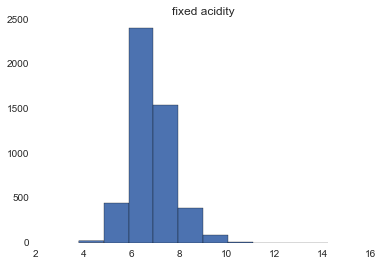

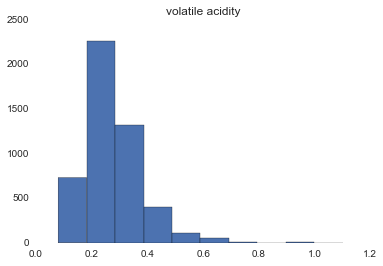

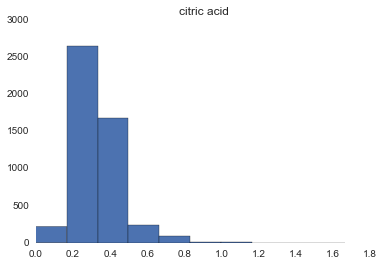

In [461]:
# Let's see the distribution of the variable values via histograms
wine_data.hist('fixed acidity') # about half have a fixed acidity between [5.9,7]
wine_data.hist('volatile acidity') # about half have a volatile acidity between [0.2,0.3]
wine_data.hist('citric acid') # about half have a citric acid between [0.19,0.3]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a0c0850>]], dtype=object)

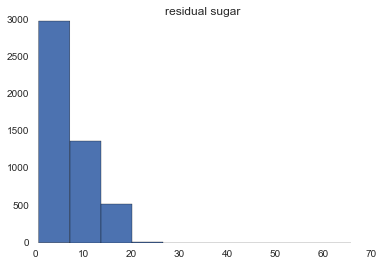

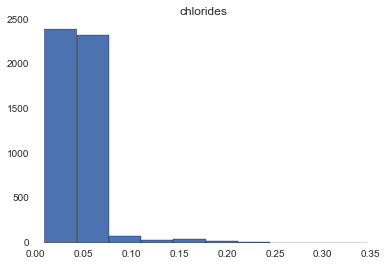

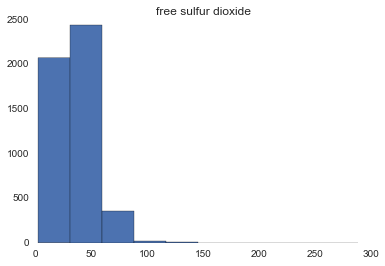

In [462]:
wine_data.hist('residual sugar') # about 3000 have a residual sugar between [0,8]
wine_data.hist('chlorides') # about half have a chlorides between [0.0,0.04]
wine_data.hist('free sulfur dioxide') # about half have a free sulfur dioxide between [30,60]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a621a90>]], dtype=object)

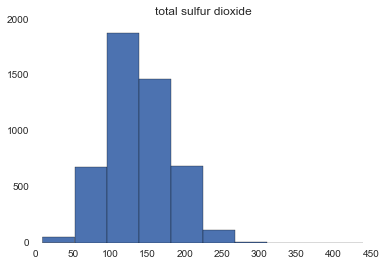

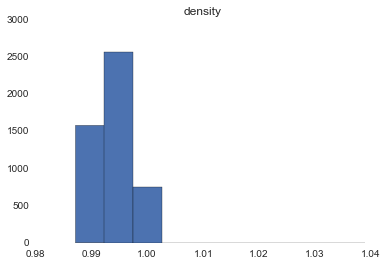

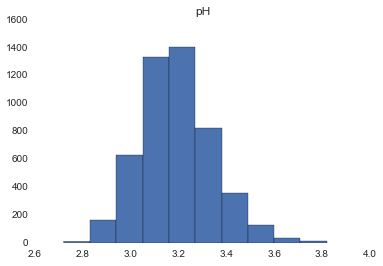

In [463]:
wine_data.hist('total sulfur dioxide') # about 1900 have a total sulfur dioxide between [100,140]
wine_data.hist('density') 
wine_data.hist('pH') # about 1450 have a pH between [3.18,3.28]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14aaf4950>]], dtype=object)

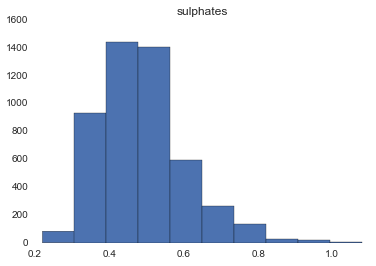

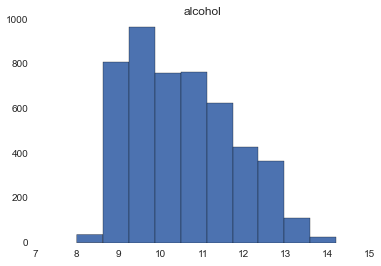

In [464]:
wine_data.hist('sulphates') 
wine_data.hist('alcohol') # about 900 have alcohol content between [9.1,9.9]

In [465]:
#wine_data.info()

In [466]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


###Features with std > 1:
residual sugar = 5.1
free sulfur dioxide = 17.0
total sulfur dioxide = 42.5
alcohol = 1.2

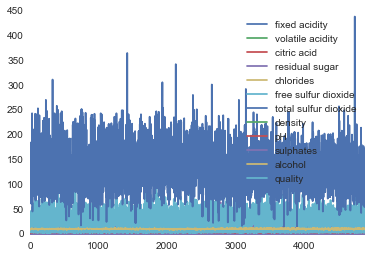

In [467]:
wine_data.plot()

##Multiple Linear Regression Model and ANOVA Table

In [468]:
import seaborn as sns

In [469]:
wine_data.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality'], dtype='object')

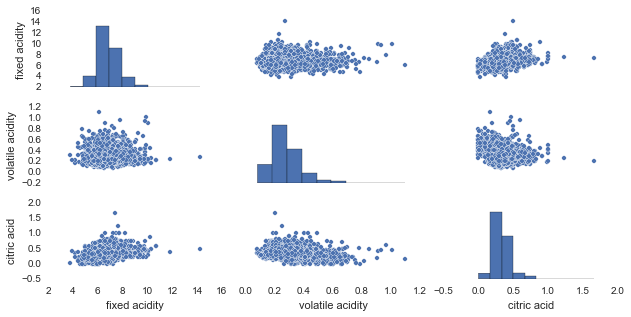

In [470]:
sns.pairplot(wine_data[['fixed acidity','volatile acidity', 'citric acid']], size = 1.5, aspect=1.95)

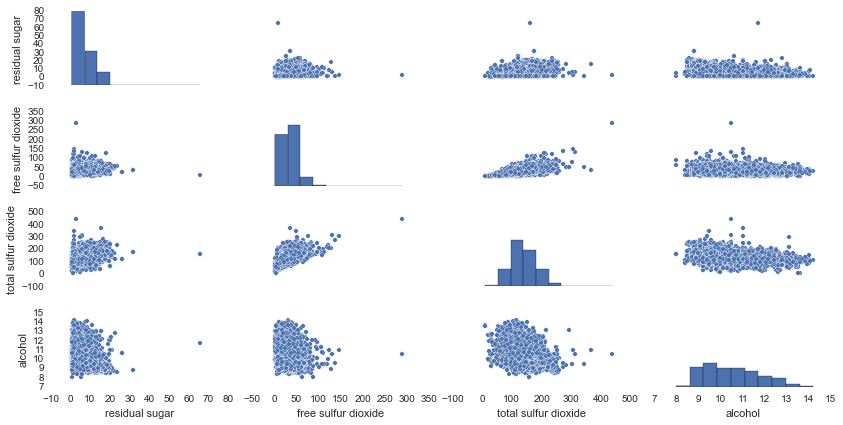

In [471]:
sns.pairplot(wine_data[['residual sugar','free sulfur dioxide', 'total sulfur dioxide', 'alcohol']], size = 1.5, aspect=1.95)

In [485]:
import statsmodels.formula.api as smf

In [501]:
wine_data.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality'], dtype='object')

In [512]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45,170,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14,132,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30,97,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47,186,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47,186,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30,97,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30,136,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45,170,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14,132,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28,129,0.99380,3.22,0.45,11.000000,6


In [505]:
str?

In [511]:
lm = smf.ols('quality ~ chlorides + density + pH + sulphates + alcohol', data=wine_data)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     244.6
Date:                Mon, 23 Mar 2015   Prob (F-statistic):          7.71e-234
Time:                        20:24:25   Log-Likelihood:                -5808.2
No. Observations:                4898   AIC:                         1.163e+04
Df Residuals:                    4892   BIC:                         1.167e+04
Df Model:                           5                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -19.5689      6.180     -3.167      0.002       -31.684    -7.454
chlorides     -2.3380      0.557     -4.197      0.000        -3.430    -1.246
density       21.2724      6.088      3.494      0.000         9.337    33.207
pH             0.2117      0.077      2.762      0.006         0.061     0.362
sulphates      0.4021      0.101      3.979      0.000         0.204     0.600
alcohol        0.3363      0.015     21.975      0.000         0.306     0.366
==============================================================================
Omnibus:                       94.846   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.496
Skew:                           0.027   Prob(JB):                     7.89e-44
Kurtosis:                       3.985   Cond. No.                     8.54e+03
==============================================================================

Warnings:
[1] The condition number is large, 8.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [443]:
wine_data.keys()

Index([u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality'], dtype='object')

##Supervised neighbors-based learning
###Classification: K-Nearest Neighbors

We want to classify/predict the ranking (1-10) of the quality of wine.
<a href="http://scikit-learn.org/stable/modules/neighbors.html">KNN Doc</a>

In [224]:
from matplotlib.colors import ListedColormap 
from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.neighbors import NearestNeighbors

In [225]:
wine_data.shape

(4898, 12)

In [226]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [347]:
features = wine_data.ix[:,:11]
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9


In [228]:
features.shape

(4898, 11)

In [329]:
target = wine_data['quality']
target.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [330]:
target.values

array([6, 6, 6, ..., 6, 7, 6])

###Parameter Search

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html">train_test_split Doc</a>


How many neighbors give us an ideal result that doesn't overfit the data? To verify the no. of neighbors use cross validation.

In [331]:
# Create the training (and test) set using scikit-learn's train_test_split function
# test_size = 30% for our training set
# random_state = 4

# Try this sequence again with the following random seed.
# Observe how it changes the scores of K quite dramatically

# We can now quickly sample a training set while holding out 30% of the data for testing (evaluating) our classifier:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.5, random_state=20)

In [332]:
# Various variables we'll need to set initially.
# Skipping two; we need it to be odd.
# Choice of K. Number of neighbors. Usually want it to be an odd number to avoid the possibility of a tie.
n_neighbors = range(1, 40, 2) 

In [333]:
n_neighbors 

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [334]:
# Loop through each neighbors value from 1 to 40 and append the scores
scores = [] # Create empty list
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n) # Number of neighbors
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test)) 

# KN Classifier: deterministic algo
# How well does it predict the other 30%

In [335]:
clf.score(X_test, y_test) 

0.43364638628011432

In [336]:
print scores

[0.49612086565945285, 0.42629644752960394, 0.43977133523887302, 0.44017966516945695, 0.43078807676602693, 0.43282972641894651, 0.43037974683544306, 0.43405471621069824, 0.43732135565536956, 0.43119640669661086, 0.44017966516945695, 0.43487137607186604, 0.43242139648836259, 0.43242139648836259, 0.43364638628011432, 0.4356880359330339, 0.43487137607186604, 0.43527970600244997, 0.43609636586361783, 0.43364638628011432]


In [337]:
len(scores)

20

In [338]:
np.mean(scores)

0.43740302164148642

Score - How good the model is.

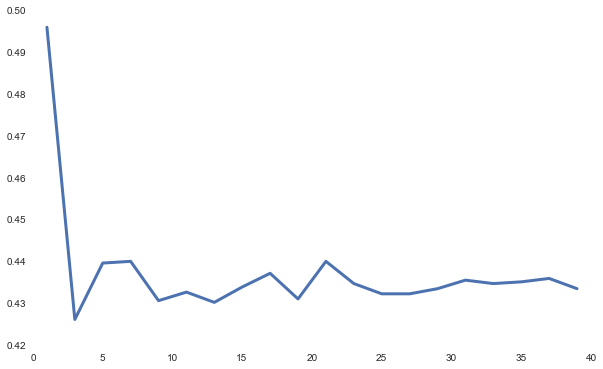

In [339]:
plt.figure(figsize=(10,6))
_ = plt.plot(n_neighbors, scores, linewidth=3.0)

####Try KNN with other random_state and check scores

We assumed all the values are of equal scale, but they are of different magnitudes.  Take a look at the first few rows to see that Total Sulfur Dioxide is in a different scale than other values.  So we need to scale these values.

In [340]:
# DO KNN after we scale the values
from sklearn.preprocessing import StandardScaler

features_scalar = StandardScaler()

In [341]:
X_train_scaled = features_scalar.fit_transform(X_train)

In [342]:
n_neighbors = range(1, 40, 2) 

In [343]:
y_test.reshape?

In [344]:
# Loop through each neighbors value from 1 to 40 and append the scores
scores = [] # Create empty list
for n in n_neighbors:
    clf_scaled = neighbors.KNeighborsClassifier(n) # Number of neighbors
    clf_scaled.fit(X_train, y_train)
    scores.append(clf_scaled.score(X_test, y_test)) 


In [345]:
# Accuracy is 74%
X_test_scaled = features_scalar.transform(X_test)

clf_scaled.score(X_test_scaled, y_test)

0.44303797468354428

Score improved only:

In [297]:
improvement = 0.44303797468354428 - 0.43364638628011432
improvement

0.009391588403429962

### Application of Cross Validation

In order to avoid overfitting, we will use cross validation. This will indicate when further training is not resulting in better generalization to an independent data set.

In [364]:
features.values

array([[  7.  ,   0.27,   0.36, ...,   3.  ,   0.45,   8.8 ],
       [  6.3 ,   0.3 ,   0.34, ...,   3.3 ,   0.49,   9.5 ],
       [  8.1 ,   0.28,   0.4 , ...,   3.26,   0.44,  10.1 ],
       ..., 
       [  6.5 ,   0.24,   0.19, ...,   2.99,   0.46,   9.4 ],
       [  5.5 ,   0.29,   0.3 , ...,   3.34,   0.38,  12.8 ],
       [  6.  ,   0.21,   0.38, ...,   3.26,   0.32,  11.8 ]])

In [365]:
type(features.values)

numpy.ndarray

In [366]:
target.values 

array([6, 6, 6, ..., 6, 7, 6])

In [367]:
n_neighbors = range(1, 40, 2) 

In [352]:
# Loop through each neighbors value from 1 to 40 and append the scores
scores = [] # Create empty list
for n in n_neighbors:
    clf = neighbors.KNeighborsClassifier(n, weights='uniform') # Number of neighbors
    scores = cross_val_score(clf, features.values, target.values.flatten(), cv=6)


In [353]:
print scores

[ 0.42682927  0.42787286  0.42034314  0.43995098  0.43312883  0.45141451]


In [354]:
np.mean(scores)

0.43325659917940135

We get a really low score even after trying different K values, random_state, test_size.

##Visualization

scores : array of float, shape=(len(list(cv)),)
Array of scores of the estimator for each run of the cross validation.

In [371]:
wine_data.keys()

Index([u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality'], dtype='object')

In [416]:
n = np.arange(11) #len(wine_data.keys())

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

# Identifies how much each feature contributes to identify that target
# Which feature is most important
# feature_selection
ax.bar(n, feature_selection.f_classif(features.values, target.values.flatten()[0])

xtickNames = ax.set_xticklabels(wine_data.keys()) #argument here?
ax.set_xticks(n)
_ = plt.setp(xtickNames, rotation=45, fontsize=16)

SyntaxError: invalid syntax (<ipython-input-416-9904dc9b9f6a>, line 11)

Fit only some features.

In [377]:
features.values[:,2:3]

array([[ 0.36],
       [ 0.34],
       [ 0.4 ],
       ..., 
       [ 0.19],
       [ 0.3 ],
       [ 0.38]])

In [378]:
clf = neighbors.KNeighborsClassifier(5, weights='uniform')
clf.fit(features.values[:, 2:3], target.values.flatten())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [379]:
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [380]:
wine_data.keys()

Index([u'fixed acidity', u'volatile acidity', u'citric acid', u'residual sugar', u'chlorides', u'free sulfur dioxide', u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol', u'quality'], dtype='object')

In [381]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, y_min = wine_data.min()[['fixed acidity', 'volatile acidity']]
x_max, y_max = wine_data.max()[['fixed acidity', 'volatile acidity']]

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 

In [399]:
#wine_data.min()

In [387]:
#wine_data.max()

##Can't plot decision boundary?

In [408]:
x_max # not a real number

nan

##Unsupervised

In [424]:
feature_cols = [col for col in wine_data.columns if col != 'quality']

In [425]:
X = wine_data[feature_cols]

In [427]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9


In [428]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, init='random', max_iter = 300, random_state=1)
Y_hat_kmeans = kmeans.fit(X).labels_

In [429]:
# Predicated Clusters
Y_hat_kmeans

array([2, 1, 3, ..., 3, 3, 3], dtype=int32)

In [431]:
print target.values

[6 6 6 ..., 6 7 6]
